<a href="https://colab.research.google.com/github/mehakh/NumericalMethods/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------
Extended matrix after 0 iteration
[[ 2.  -2.   2.   5.   7. ]
 [ 0.   1.  -2.  -1.5 -7.5]
 [ 0.  -1.   2.   1.5  7.5]
 [ 0.  -7.   3.   1.   2. ]]
---------------------------------------------
Extended matrix after 1 iteration
[[ 2.   -2.    2.    5.    7.  ]
 [ 0.   -7.    3.    1.    2.  ]
 [ 0.    0.    1.57  1.36  7.21]
 [ 0.    0.   -1.57 -1.36 -7.21]]
---------------------------------------------
Extended matrix after 2 iteration
[[ 2.   -2.    2.    5.    7.  ]
 [ 0.   -7.    3.    1.    2.  ]
 [ 0.    0.    1.57  1.36  7.21]
 [ 0.    0.    0.    0.    0.  ]]
---------------------------------------------
Matrix is singular
Matrix has infinite solutions, calculationg x4 = 2
Final matrix
[[ 2.   -2.    2.    5.    7.  ]
 [ 0.   -7.    3.    1.    2.  ]
 [ 0.    0.    1.57  1.36  7.21]
 [ 0.    0.    0.    1.    2.  ]]
Solution:
[[-3.13636364]
 [ 1.22727273]
 [ 2.86363636]
 [ 2.        ]]
Error: 
[[ 0.0000000e+00]
 [ 0.0000000e+00]
 [-8

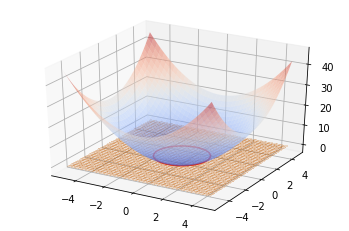

TypeError: ignored

In [16]:
import numpy as np
import math
# !!! working example (both Gaussian elimination and LU decomposition (first part) at one)
# !!! for defense, clear the code: add necessary lines and remove unnecessary ones

def swap_row(Anew, i, j):
    for k in range(n + 1):
        temp = Anew[i][k]
        Anew[i][k] = Anew[j][k]
        Anew[j][k] = temp

#A = np.array([[1.0,1.0,1.0,1.0],[1.0,-1.0,-1.0,1.0],[2.0,1.0,-1.0,2.0],[3.0,1.0,2.0,-1.0]])
#b = np.array([[2.0],[0.0],[9.0],[7.0]])

 # 1
#A = np.array([[1.0,-2.0,3.0,4.0],[1.0,0.0,-1.0,1.0],[2.0,-2.0,2.0,5.0],[0.0,-7.0,3.0,1.0]])
#b = np.array([[11.0],[-4.0],[7.0],[2.0]])

 # 2
 # A = np.array([[3.0,7.0,1.0,3.0],[1.0,-6.0,6.0,9.0],[4.0,4.0,-7.0,1.0],[-1.0,3.0,8.0,2.0]])
 # b = np.array([[37.0],[11.0],[38.0],[-1.0]])

# Task 3 solvable
# A = np.array([[0.0,1.0,2.0,1.0],[6.0,-2.0,3.0,4.0],[0.0,3.0,4.0,-3.0],[0.0,-4.0,3.0,1.0]])
# b = np.array([[2.0],[-15.0],[10.0],[-2.0]])

# Task 4 solvable
# A = np.array([[3.0,7.0,1.0,3.0],[1.0,-6.0,6.0,8.0],[4.0,4.0,-7.0,1.0],[4.0,16.0,2.0,0.0]])
# b = np.array([[40.0],[19.0],[36.0],[48.0]])

# Task 9 no solution
# A = np.array([[3.0,7.0,1.0,3.0],[1.0,-6.0,6.0,8.0],[4.0,4.0,-7.0,1.0],[-1.0,3.0,8.0,2.0]])
# b = np.array([[11.0],[3.0],[1.0],[1.0]])

has_solution = True
is_infinite = False

# print(np.linalg.solve(A,b))
# print(np.linalg.lstsq(A,b))

n = np.shape(A)[0]
Anew = np.hstack((A, b))
for i in range(n):
  i_max = i
  v_max = Anew[i_max][i]
  for j in range(i+1,n):
    if (abs(Anew[j][i]) > v_max):
      v_max = Anew[j][i]
      i_max = j
  if not Anew[i][i_max]:
    has_solution = False
    print("---------------------------------------------")
    print("Matrix is singular")
    if not Anew[i][n]:
      has_solution = True
      is_infinite = True
      print("Matrix has infinite solutions, calculationg x4 = 2")
      Anew[i][n] = 2.0
      Anew[i][n-1] = 1.0
      print("Final matrix")
      print(Anew.round(2))
    break
  if (i_max != i):
      swap_row(Anew, i, i_max)
  for k in range(i + 1, n):
    f = Anew[k][i]/Anew[i][i]
    for j in range(i + 1, n + 1):
        Anew[k][j] -= Anew[i][j]*f
    Anew[k][i] = 0
 
  print("---------------------------------------------")
  print("Extended matrix after {0} iteration".format(i))
  print(Anew.round(2))

# backward substitution (Gaussian)
if has_solution:
  x = np.zeros((n,1))

  for i in range(n-1,-1,-1):
    x[i] = (Anew[i,n:]-Anew[i,i+1:n]@x[i+1:n])/Anew[i,i]

  print("Solution:")
  print(x)
  # check error
  print("Error: ")
  print((A@x-b))
  if not is_infinite:
    print("Result of numpy solver:")
    print(np.linalg.solve(A,b))
else: print("No solution exists")

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
#https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html


X = np.arange(-5,5,0.25)
Y = np.arange(-5,5,0.25)
XX, YY = np.meshgrid(X,Y)

Z1 = XX**2+YY**2-3
Z2 = XX**2-YY**2

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, Z1, cmap=cm.coolwarm,
                       alpha=0.5)
surfZ = ax.plot_surface(XX,YY,np.zeros(np.shape(Z1)), antialiased=False, alpha=0.2)
cp = ax.contour(X, Y, Z1, levels = 0, colors = 'red')
plt.show()

fig = plt.figure(block=False)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, Z2, cmap=cm.summer,
                       antialiased=False, alpha=0.5)
surfZ = ax.plot_surface(XX,YY,np.zeros(np.shape(Z1)), antialiased=False, alpha=0.2)
cp = ax.contour(X, Y, Z2, levels = 0, colors = 'green')
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)
cp = ax.contour(X, Y, Z1, levels = 0, colors = 'red')
cp = ax.contour(X, Y, Z2, levels = 0, colors = 'green')
ax.set_aspect('equal', 'box')
plt.show()
